In [163]:
# default_exp core

# Blurry

> **Blurry** detects faces in photos and blurs them to increase privacy.

In [164]:
#hide
from nbdev.showdoc import *

In [165]:
#export
import cv2
import numpy as np
import fastcore
from pathlib import Path
from PIL import Image

In [166]:
def show_img(img:np.ndarray)->None:
    display(Image.fromarray(img))

In [167]:
#export
def blur(img, kernel_size=5, sigmaX=0):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), sigmaX)

In [168]:
#export
def find_faces(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    return faces

In [169]:
#export
def replace_faces(img, factor=1):
    """Finds faces in a picture and blurs/pixelates them
    img: cv2 image in BGR format
    
    returns:
    cv2 image in BGR format
    """
    faces = find_faces(img)
    for (x, y, w, h) in faces:
        kernel_size = max(w,h)//4
        kernel_size *= factor
        if kernel_size % 2 == 0:
            kernel_size += 1
        img[y:y+h,x:x+w] = blur(img[y:y+h,x:x+w], kernel_size=kernel_size)
    return img

In [170]:
#export
def anonymize(fn:str, factor=1)->np.ndarray:
    img = cv2.imread(fn)
    assert isinstance(img, np.ndarray), "Image file not found"
    img = replace_faces(img, factor=factor)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return rgb

In [171]:
#export
def test_bulk(path):
    path = Path(path)
    for fn in path.ls():
        blurred = anonymize(str(fn))
        show_img(blurred)

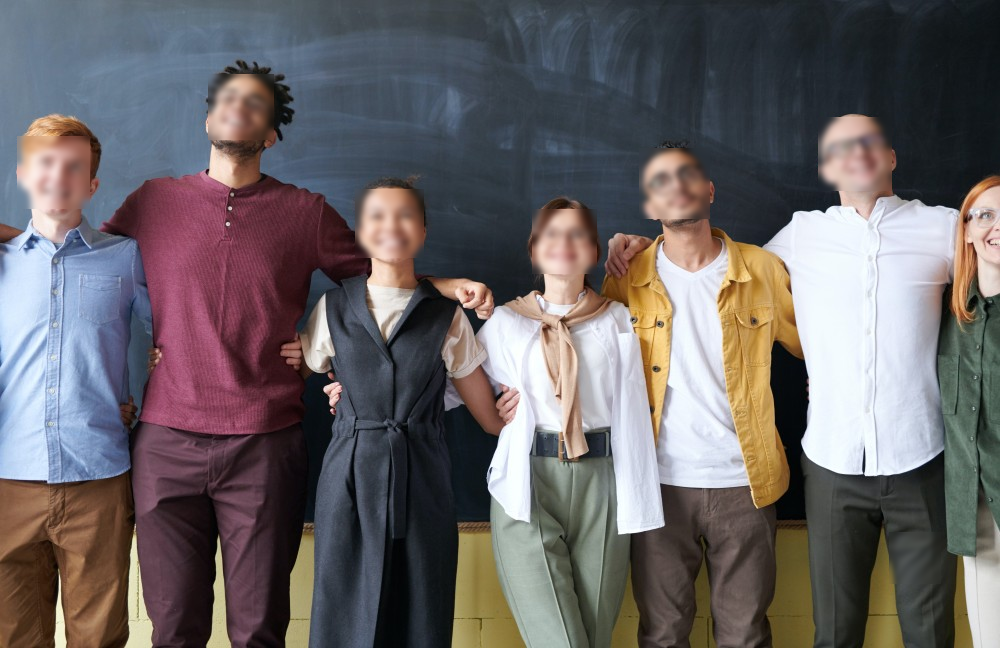

In [172]:
test_bulk('test_images')